In [121]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import reedsolo as rs
#from google.colab.patches import cv2_imshow

## **Test Case 2**

In [122]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

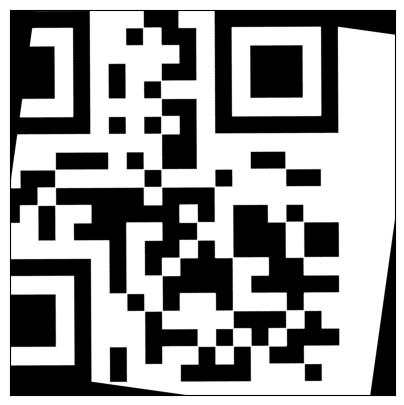

In [123]:
img = cv2.imread("02-Matsawar-3edel-ya3am.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
img = rotate_image(img, -8)

kernel = np.ones((3, 3), np.uint8)
dilated_img = cv2.dilate(img, kernel, iterations=1)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(dilated_img, cmap='gray');

## **Test Case 3**

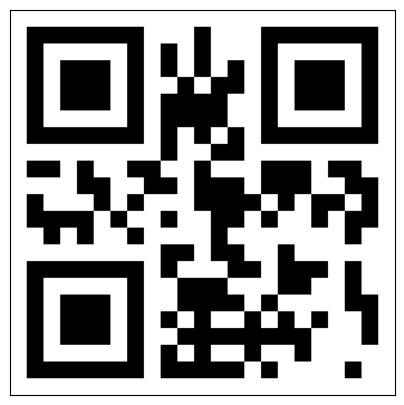

In [124]:
img = cv2.imread("03-Leffy-bina-ya-donya.png", cv2.IMREAD_GRAYSCALE)
#_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
img = cv2.rotate(img, cv2.ROTATE_180)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 4**

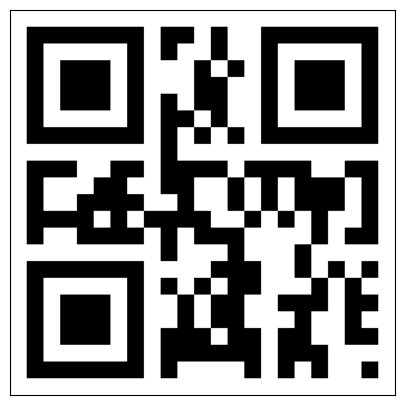

In [125]:
img = cv2.imread("04-Black-mirror.png")
img = 255 - img
_, img = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
img = cv2.flip(img, 1)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 5**

In [149]:
def add_quiet_zone(qr_img, border_size = 20):
    height, width = qr_img.shape
    new_img = np.full((height + 2*border_size, width + 2*border_size), 255, dtype=np.uint8)
    new_img[border_size:border_size + height, border_size:border_size + width] = qr_img
    
    return new_img

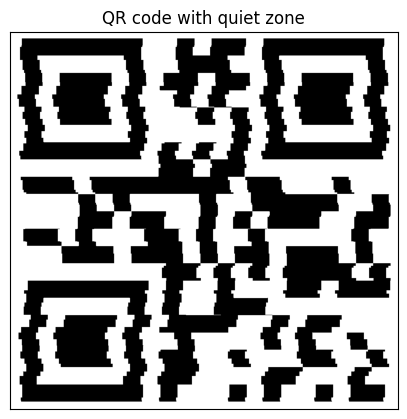

In [150]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the new image and convert to grayscale
img_path = "05-Caesar-cipher.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Adjust the binarization threshold to improve quiet zone detection
_, img_binary = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

# Reinitialize the start and end positions for rows and columns
start_row = -1
start_col = -1
end_row = -1
end_col = -1

# Find the first black pixel in each row and column to set boundaries
# Find start row
for row_index in range(img_binary.shape[0]):
    if any(img_binary[row_index] < 255):
        start_row = row_index
        break

# Find end row
for row_index in range(img_binary.shape[0] - 1, -1, -1):
    if any(img_binary[row_index] < 255):
        end_row = row_index + 1
        break

# Find start column
for col_index in range(img_binary.shape[1]):
    if any(img_binary[:, col_index] < 255):
        start_col = col_index
        break

# Find end column
for col_index in range(img_binary.shape[1] - 1, -1, -1):
    if any(img_binary[:, col_index] < 255):
        end_col = col_index + 1
        break

# Check if the boundaries are valid
if (start_row >= 0 and end_row > start_row) and (start_col >= 0 and end_col > start_col):
    # Crop the image using the detected boundaries
    qr_no_quiet_zone = img_binary[start_row:end_row, start_col:end_col]

    qr_with_quiet_zone = add_quiet_zone(qr_no_quiet_zone, 20)

    # Display the QR code without the quiet zone
    fig = plt.figure(figsize=(5, 5))
    plt.xticks([], [])
    plt.yticks([], [])
    plt.title("QR code with quiet zone")
    #plt.imshow(qr_no_quiet_zone, cmap="gray")
    plt.imshow(qr_with_quiet_zone, cmap="gray")  # Display the corrected image
else:
    print("Error: Could not find valid boundaries. Please check the image or preprocessing.")

## **Test Case 6**

/var/folders/xd/m03fffl12yg6w4cjfgzx_59w0000gn/T/ipykernel_23153/625531102.py:20: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


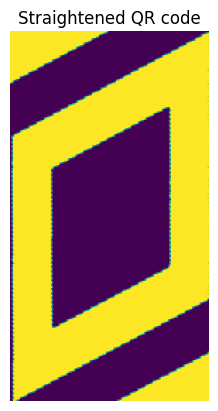

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the new image and convert it to grayscale
img_path = "06-Railfence-cipher.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Apply binarization with a threshold to create a binary image
_, img_binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

# Detect edges and contours to find the bounding box of the QR code
edges = cv2.Canny(img_binary, 100, 200)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour and get the minimum area rectangle to straighten the QR code
largest_contour = max(contours, key=cv2.contourArea)
rect = cv2.minAreaRect(largest_contour)
box = cv2.boxPoints(rect)
box = np.int0(box)

# Define the width and height for the perspective transformation
width = int(rect[1][0])
height = int(rect[1][1])

# Define source and destination points for perspective transformation
src_pts = box.astype("float32")
dst_pts = np.array([[0, height - 1], [0, 0], [width - 1, 0], [width - 1, height - 1]], dtype="float32")

# Create the perspective transformation matrix and apply it to straighten the QR code
M = cv2.getPerspectiveTransform(src_pts, dst_pts)
straightened_qr = cv2.warpPerspective(img_binary, M, (width, height))

# Display the straightened QR code
plt.imshow(straightened_qr, cmap="gray")
plt.title("Straightened QR code")
plt.axis("off")
plt.imshow(straightened_qr)

## **Trying to generalize**

In [ ]:
def generalize_preprocessing(img_path):

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    preprocess_steps = [
        lambda x: x,
        cv2.bitwise_not,
        lambda x: cv2.rotate(x, cv2.ROTATE_90_CLOCKWISE),
        lambda x: cv2.rotate(x, cv2.ROTATE_180),
        lambda x: cv2.rotate(x, cv2.ROTATE_90_COUNTERCLOCKWISE),
    ]

    for step in preprocess_steps:
        processed_img = step(img)
        img_threshold = cv2.adaptiveThreshold(processed_img, 255,
                                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                              cv2.THRESH_BINARY, 11, 2)
        plt.figure(figsize=(5, 5))
        plt.imshow(img_threshold, cmap='gray')
        plt.xticks([], [])
        plt.yticks([], [])
        plt.show()

## **Test Case 7 the mighty Zinger**

<function matplotlib.pyplot.show(close=None, block=None)>

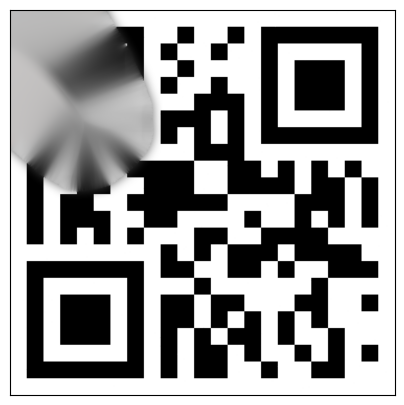

In [9]:
image_path = "07-THE-MIGHTY-FINGER.png"
image = cv2.imread(image_path)

#height, width, _ = image.shape
#mask= np.zeros((height, width), np.uint8)

#mask[height//2:, :width//2] = 255

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

saturation_threshold = 0
_, thumb_mask = cv2.threshold(s, saturation_threshold, 255, cv2.THRESH_BINARY)

#kernel = np.ones((3, 3), np.uint8)
#thumb_mask = cv2.morphologyEx(thumb_mask, cv2.MORPH_CLOSE, kernel)

inpainted_image = cv2.inpaint(image, thumb_mask, 50, cv2.INPAINT_TELEA)
inpainted_image_rgb = cv2.cvtColor(inpainted_image, cv2.COLOR_BGR2RGB)

#inpainted_image = image - inpainted_image
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(inpainted_image_rgb);
plt.show

## **Test Case 8**

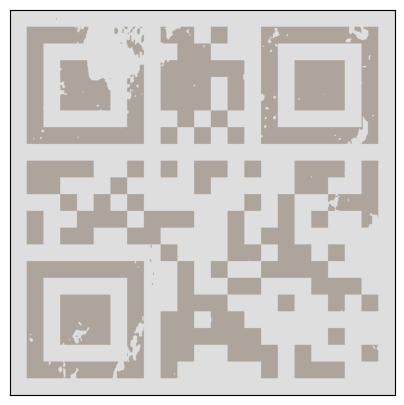

In [10]:
img = cv2.imread("08-Compresso-Espresso.png")

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#adaptive_threshold = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
_, binary_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

kernel = np.ones((3, 3), np.uint8)
#dilated_img = cv2.dilate(binary_img, kernel, iterations=1)
#opening = cv2.morphologyEx(_, cv2.MORPH_OPEN, kernel)


fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 9**


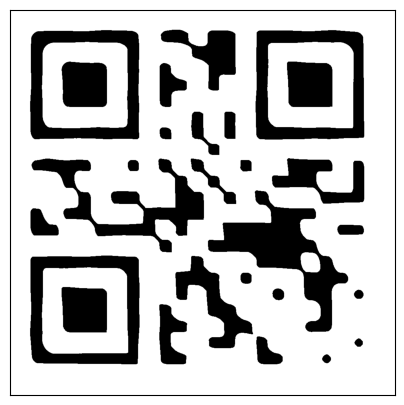

In [11]:
def sharpen_img(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

    return cv2.filter2D(image, -1, kernel)

def add_quiet_zone(image, border_size=10):

    return cv2.copyMakeBorder(image, border_size, border_size, border_size, border_size, cv2.BORDER_CONSTANT, value=[255, 255, 255])

img = cv2.imread("09-My-phone-fell-while-taking-this-one-...-or-did-it.png", cv2.IMREAD_GRAYSCALE)
#img = 255 - img
_, img_thresh = cv2.threshold(img, 53, 255, cv2.THRESH_BINARY)
img_sharpened = sharpen_img(img_thresh)
edges = cv2.Canny(img_sharpened, 100, 200)
img_combined = cv2.bitwise_or(img_sharpened, edges)
img_final = add_quiet_zone(img_combined, 20)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img_final, cmap='gray');

## **Test case: 10 and now it is similar to test case 7 the mighty Zinger**

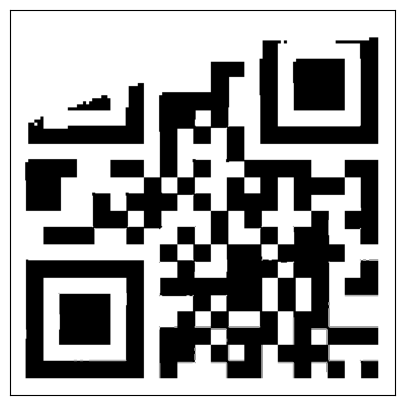

In [ ]:
def fill_missing_area(img, mask, method=cv2.INPAINT_TELEA):
    return cv2.inpaint(img, mask, 3, method)

img = cv2.imread("10-Gone-With-The-Wind.png", cv2.IMREAD_GRAYSCALE)
img = 255 - img
_, img = cv2.threshold(img, 53, 255, cv2.THRESH_BINARY_INV)

mask = np.zeros(img.shape, dtype=np.uint8)
mask[0:int(img.shape[0]), int(img.shape[1]):img.shape[1]] = 255

img_filled = fill_missing_area(img, mask)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img_filled, cmap='gray');

## **Test Case 11**

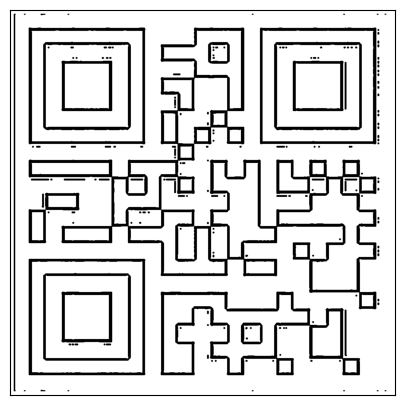

In [135]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def rotate_image(mat, angle):
    """Rotates an image (angle in degrees) and expands image to avoid cropping"""
    height, width = mat.shape[:2]  # image shape has 3 dimensions
    image_center = (width/2, height/2)  # getRotationMatrix2D needs coordinates in reverse order (width, height) compared to shape

    rotation_mat = cv2.getRotationMatrix2D(image_center, angle, 1.)

    # rotation calculates the cos and sin, taking absolutes of those.
    abs_cos = abs(rotation_mat[0,0])
    abs_sin = abs(rotation_mat[0,1])

    # find the new width and height bounds
    bound_w = int(height * abs_sin + width * abs_cos)
    bound_h = int(height * abs_cos + width * abs_sin)

    # subtract old image center (bringing image back to origo) and adding the new image center coordinates
    rotation_mat[1, 2] += bound_h/2 - image_center[1]
    rotation_mat[0, 2] += bound_w/2 - image_center[0]

    # rotate image with the new bounds and translation
    rotated_mat = cv2.warpAffine(mat, rotation_mat, (bound_w, bound_h))
    return rotated_mat

# Load the image in grayscale
img = cv2.imread("enhanced_qr.png", cv2.IMREAD_GRAYSCALE)

# Apply a border to ensure proper scanning
bordered_img = cv2.copyMakeBorder(img, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=[255, 255, 255])

# Optional: Try rotating the image if suspected misalignment
angle_of_rotation = 0  # Change this as needed to find the right orientation
rotated_img = rotate_image(bordered_img, angle_of_rotation)

# Display the processed image
fig = plt.figure(figsize=(5, 5))
plt.xticks([], [])
plt.yticks([], [])
plt.imshow(rotated_img, cmap='gray')
plt.show()


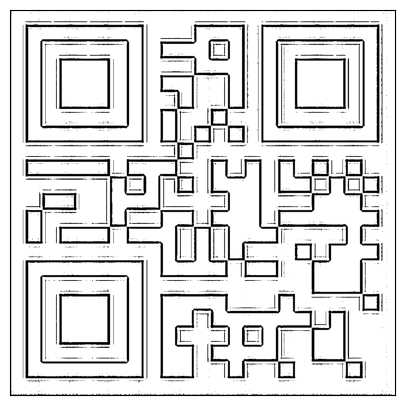

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread("11-weewooweewooweewoo.png", cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if img is None:
    print("Error: Image could not be read.")
else:
    # Apply Gaussian adaptive thresholding
    adaptive_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv2.THRESH_BINARY, 11, 2)
    
    # Display the processed image
    fig = plt.figure(figsize=(5, 5))
    plt.xticks([], [])
    plt.yticks([], [])
    plt.imshow(adaptive_thresh, cmap='gray')
    plt.show()

    # Save the result
    cv2.imwrite("/mnt/data/processed_qr_adaptive.png", adaptive_thresh)


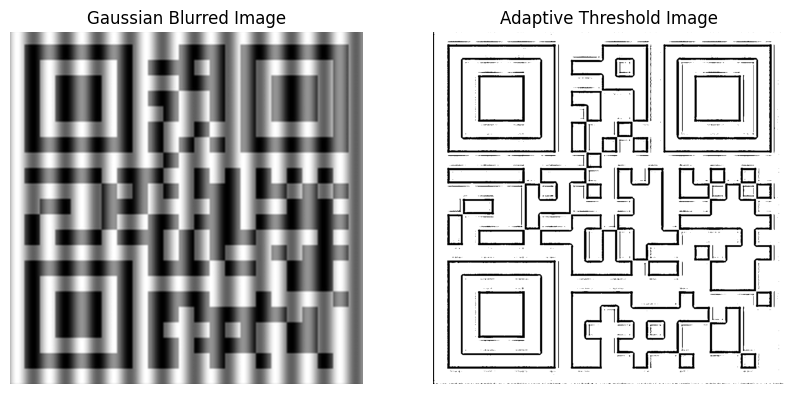

In [41]:
import cv2
import matplotlib.pyplot as plt

def process_image(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Image not found.")
        return None, None

    # Apply Gaussian blur to reduce noise
    gaussian = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply adaptive thresholding after Gaussian blur
    adaptive_thresh = cv2.adaptiveThreshold(gaussian, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv2.THRESH_BINARY, 11, 2)

    return gaussian, adaptive_thresh

def display_images(images, titles):
    plt.figure(figsize=(10, 5))
    for i, (img, title) in enumerate(zip(images, titles), 1):
        plt.subplot(1, 2, i)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

# Path to your QR code image
image_path = '11-weewooweewooweewoo.png'

# Process the image
gaussian_image, adaptive_thresh_image = process_image(image_path)

# Display the images
if adaptive_thresh_image is not None:
    display_images([gaussian_image, adaptive_thresh_image], ["Gaussian Blurred Image", "Adaptive Threshold Image"])


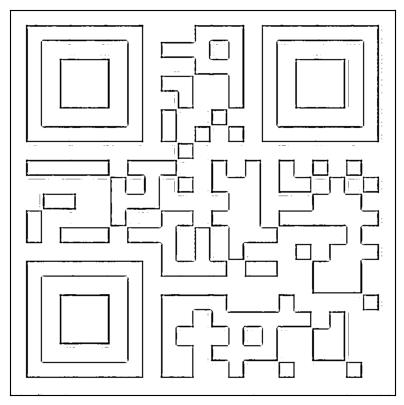

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread("11-weewooweewooweewoo.png", cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if img is None:
    print("Error: Image could not be read.")
else:
    # Apply Gaussian adaptive thresholding
    adaptive_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv2.THRESH_BINARY, 11, 2)

    # Define the structuring element for morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

    # Apply morphological closing to fill in the gaps
    closed = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_CLOSE, kernel)

    # Optionally apply dilation to further enhance the structure
    dilated = cv2.dilate(closed, kernel, iterations=1)
    
    # Display the processed image
    fig = plt.figure(figsize=(5, 5))
    plt.xticks([], [])
    plt.yticks([], [])
    plt.imshow(dilated, cmap='gray')
    plt.show()

    # Save the result
    cv2.imwrite("/mnt/data/processed_qr_filled.png", dilated)


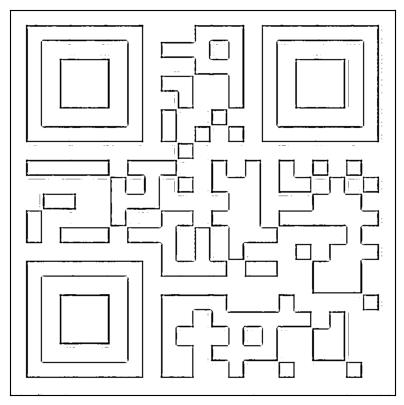

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread("11-weewooweewooweewoo.png", cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if img is None:
    print("Error: Image could not be read.")
else:
    # Apply Gaussian adaptive thresholding
    adaptive_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv2.THRESH_BINARY, 11, 2)

    # Define the structuring element for morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

    # Apply morphological closing to fill in the gaps
    closed = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_CLOSE, kernel)

    # Optionally apply dilation to further enhance the structure
    dilated = cv2.dilate(closed, kernel, iterations=1)

    # Re-apply binary threshold to ensure pure binary output
    _, final_binary = cv2.threshold(dilated, 128, 255, cv2.THRESH_BINARY)

    # Invert the image if needed (uncomment the next line if the QR code is white on black)
    # final_binary = cv2.bitwise_not(final_binary)

    # Display the processed image
    fig = plt.figure(figsize=(5, 5))
    plt.xticks([], [])
    plt.yticks([], [])
    plt.imshow(final_binary, cmap='gray')
    plt.show()

    # Save the result
    cv2.imwrite("/mnt/data/processed_qr_final.png", final_binary)


Unable to decode the QR code. The image may not be a valid QR code or requires further processing.


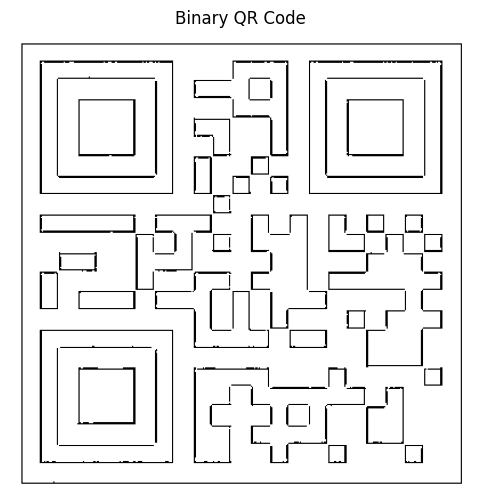

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the QR code image
image_path = '/Users/johnmohsenwadie/Desktop/ASU/AGILE/Yalla-N_Scan/outputt11.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if image is loaded properly
if image is None:
    print("Image not loaded. Please check the file path.")
else:
    # Normalize the image to ensure it is binary
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Initialize the QRCode detector
    detector = cv2.QRCodeDetector()

    # Detect and decode the QR code
    data, vertices, _ = detector.detectAndDecode(binary_image)

    if vertices is not None and data:
        print("QR Code detected and decoded successfully!")
        print("Decoded Data:", data)
    else:
        print("Unable to decode the QR code. The image may not be a valid QR code or requires further processing.")

    # Show the binary image for visualization
    plt.figure(figsize=(6,6))
    plt.imshow(binary_image, cmap='gray')
    plt.title("Binary QR Code")
    plt.axis('off')
    plt.show()


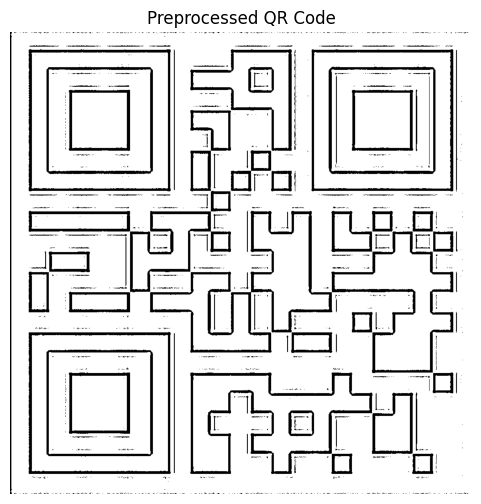

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the QR code image
image_path = '11-weewooweewooweewoo.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded
if image is None:
    print("Image not loaded. Please check the file path.")
else:
    # Apply Gaussian Blur
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Adaptive Thresholding
    thresh_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                         cv2.THRESH_BINARY, 11, 2)

    # Display the processed image
    plt.figure(figsize=(6,6))
    plt.imshow(thresh_image, cmap='gray')
    plt.title("Preprocessed QR Code")
    plt.axis('off')
    plt.show()

    # Optionally, you can save this preprocessed image
    cv2.imwrite('/mnt/data/preprocessed_qr_code.png', thresh_image)


## **Test Case 12**

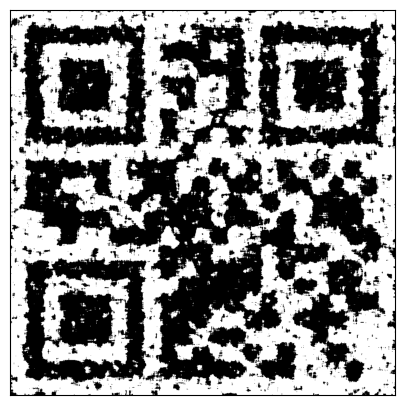

In [ ]:
img = cv2.imread("12-mal7-w-felfel.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
img = cv2.medianBlur(img,15)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 13**

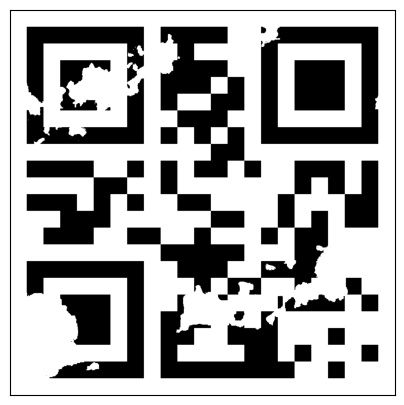

In [34]:
img = cv2.imread("13-2el-noor-2ata3.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 1, 255, cv2.THRESH_BINARY)
#img = cv2.medianBlur(img,5)
fig = plt.figure(figsize=(5, 5))
plt.xticks([], [])
plt.yticks([], [])
plt.imshow(img, cmap='gray')

## **Test Case 14**

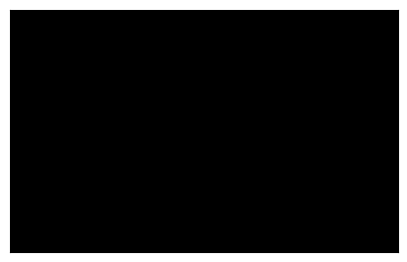

In [ ]:
img = cv2.imread("14-BANANAAA!!!.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 53, 255, cv2.THRESH_BINARY)
img = rotate_image(img,-22)

#awl parameter ymeen w shemal wel tany foo2 w taht
tl = (542,585)
bl = (540,715)
tr = (678,587)
br = (675,715)

cv2.circle(img , tl , 5 ,(0,0,255),-1)
cv2.circle(img , bl , 5 ,(0,0,255),-1)
cv2.circle(img , tr , 5 ,(0,0,255),-1)
cv2.circle(img , br , 5 ,(0,0,255),-1)

#pts1 = [tl , br , tr , br]
#pts2 = [[0,0] , [0,480] , [640,0],[640,480]]

pts1 = np.array([tl, br, tr, br], dtype=np.float32)
pts2 = np.array([[0,0] , [0,480] , [640,0],[640,480]], dtype=np.float32)

matrix = cv2.getPerspectiveTransform(pts1,pts2)
img = cv2.warpPerspective(img,matrix,(800,500))

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 15**

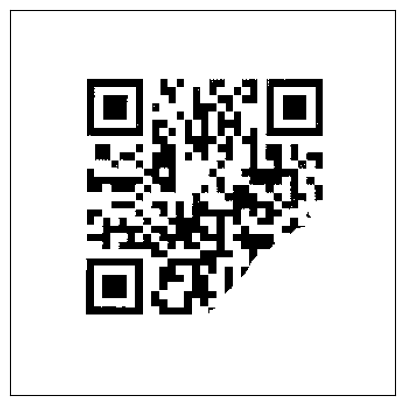

In [16]:
img = cv2.imread("15-beast-mode-computer-vision-(this-one-is-from-wikipedia).jpg", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 53, 255, cv2.THRESH_BINARY)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');

## **Test Case 16** 

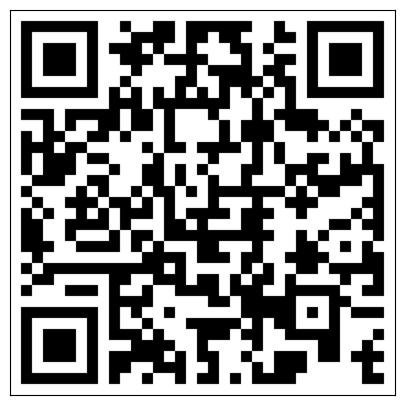

In [18]:
img = cv2.imread("16-V3-QR-Code...-can-you-do-it.png")
img = 255 - img
_, img = cv2.threshold(img, 53, 255, cv2.THRESH_BINARY_INV)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img, cmap='gray');